<a href="https://colab.research.google.com/github/HammadN98/Agrupamento-de-clientes/blob/main/notebooks/E_commerce_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Pre-processamento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Agrupamento-de-clientes/refs/heads/main/dados/E-commerce_CustomerBehavior.csv")
dados

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


## 1. Conhecendo os dados

In [3]:
dados.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
dados.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


## 2. Limpeza dos dados

### 2.1 Removendo valores nulos

A categoria 'Satisfaction Level' e a unica que possui valore nulos

In [6]:
dados['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

Tratando-se de uma categoria ordinal a mesma sera removida

In [7]:
dados = dados.dropna(subset=['Satisfaction Level'])
dados.shape

(348, 11)

### 2.2 VErificando a existencia de duplicatas

In [8]:
dados.duplicated().sum()

0

nada duplicado

### 2.3 Analisando outiliers

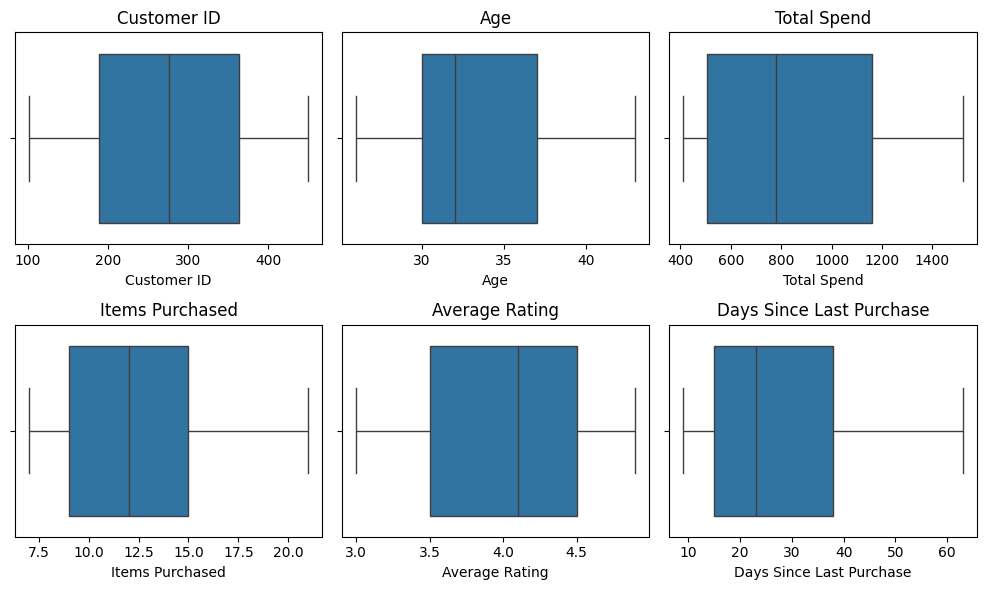

In [9]:
num_columns = dados.select_dtypes(include=['float64', 'int']).columns

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, (len(num_columns) + 1) // 2, i)
    sns.boxplot(x=dados[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Outliers nao encontrados visualmente

## 3. Padronizacao das variaveis numericas

In [10]:
scaler = StandardScaler()

#num_columns = colunas numericas
dados[num_columns] = scaler.fit_transform(dados[num_columns])

dados

<ipython-input-10-949b8412a9aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados[num_columns] = scaler.fit_transform(dados[num_columns])


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,-1.728843,Female,-0.939761,New York,Gold,0.754230,0.330381,0.996757,True,-0.120022,Satisfied
1,-1.718957,Male,0.086720,Los Angeles,Silver,-0.186319,-0.394236,0.132172,False,-0.640260,Neutral
2,-1.709072,Female,1.934386,Chicago,Bronze,-0.933192,-0.877314,-1.078247,True,1.143413,Unsatisfied
3,-1.699187,Male,-0.734465,San Francisco,Gold,1.751261,1.538076,1.169674,False,-1.086179,Satisfied
4,-1.689301,Male,-1.350354,Miami,Silver,-0.352721,0.088842,-0.040745,True,2.109570,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,1.681631,Male,-0.323873,Miami,Silver,-0.519124,-0.635775,-0.386579,True,1.143413,Unsatisfied
346,1.691517,Female,0.497312,Houston,Bronze,-1.044635,-1.118853,-1.769915,False,0.028617,Neutral
347,1.701402,Female,-0.734465,New York,Gold,0.949704,0.813459,0.823840,True,0.102937,Satisfied
348,1.711288,Male,0.086720,Los Angeles,Silver,-0.187149,-0.394236,0.305089,False,-0.417301,Neutral


## 4. K-measn apenas com as variveis numericas originais apos a normalizacao

### 4.1 Numero de K usando o metodo do cotovelo

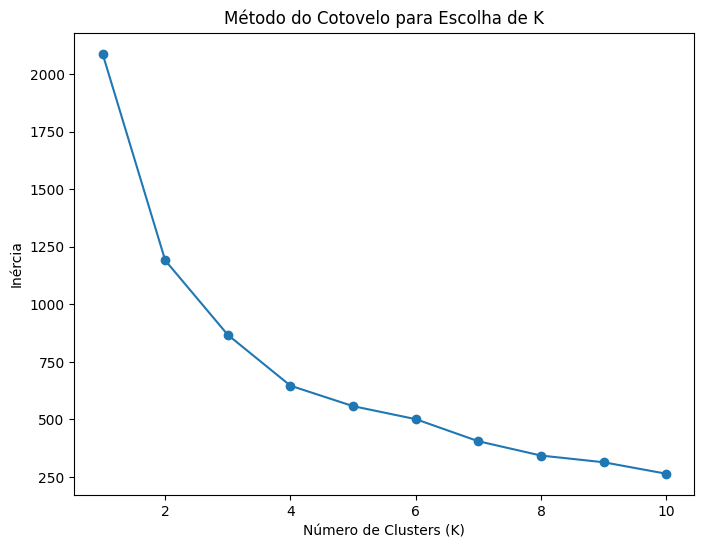

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir o intervalo de valores de K para testar
range_n_clusters = range(1, 11)
inertia = []

# Calcular a inércia para cada valor de K
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dados[num_columns])
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de K')
plt.show()


K = 4, pois representa o ponto que apartir dele a inercia diminui mais lentamente

### 4.2 K-means

In [12]:
# Configurar e rodar o K-means com K=4, valor obtido acima
kmeans = KMeans(n_clusters=4, random_state=42)
dados['Cluster'] = kmeans.fit_predict(dados[num_columns])

dados.head()


<ipython-input-12-7e974e305096>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Cluster'] = kmeans.fit_predict(dados[num_columns])


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Cluster
0,-1.728843,Female,-0.939761,New York,Gold,0.754230,0.330381,0.996757,True,-0.120022,Satisfied,3
1,-1.718957,Male,0.086720,Los Angeles,Silver,-0.186319,-0.394236,0.132172,False,-0.640260,Neutral,3
2,-1.709072,Female,1.934386,Chicago,Bronze,-0.933192,-0.877314,-1.078247,True,1.143413,Unsatisfied,0
3,-1.699187,Male,-0.734465,San Francisco,Gold,1.751261,1.538076,1.169674,False,-1.086179,Satisfied,1
4,-1.689301,Male,-1.350354,Miami,Silver,-0.352721,0.088842,-0.040745,True,2.109570,Unsatisfied,2


### 4.3 Analise dos clusters

In [13]:
# Estatísticas descritivas por cluster
cluster_summary = dados.groupby('Cluster')[num_columns].mean()
display(cluster_summary)


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Cluster,,,,,,
0,0.016543,1.196040,-1.034325,-0.993846,-1.205660,0.383918
1,0.051861,-0.859646,1.475438,1.499783,1.258242,-0.924850
2,0.173868,-1.189049,-0.421874,-0.095188,-0.081916,1.766284
3,-0.122190,-0.144705,0.133144,-0.051690,0.342817,-0.382844


para referencia ao ler a tabela acima:

* **Entre -1 e 1:** Esse intervalo cobre aproximadamente 68% dos dados em uma distribuição normal, então valores dentro desse intervalo não se afastam tanto da média e podem ser considerados "próximos da média".

* **Entre -2 e -1 ou entre 1 e 2:** Valores nesse intervalo estão entre 1 e 2 desvios padrões da média, o que representa aproximadamente 27% dos dados na distribuição normal (ou seja, já um grupo menor). Esses valores começam a indicar um desvio mais notável em relação à média.

* **Abaixo de -2 ou acima de 2:** Valores que se afastam da média em mais de 2 desvios padrões são bastante extremos e representam aproximadamente apenas 5% dos dados em uma distribuição normal. Esses valores são geralmente considerados muito fora da média e indicam características bastante distintas para esse cluster.

## 5. Entendendo os resultados

* Cluster 0: Clientes de baixo gasto e pouca frequência de compra.
* Cluster 1: Clientes de alto gasto, compram com frequência, e estão mais satisfeitos.
* Cluster 2: Clientes mais jovens que compram com pouca frequência.
* Cluster 3: Clientes medianos em gasto, frequência e satisfação.


## 6. Visualizando os clusters formados


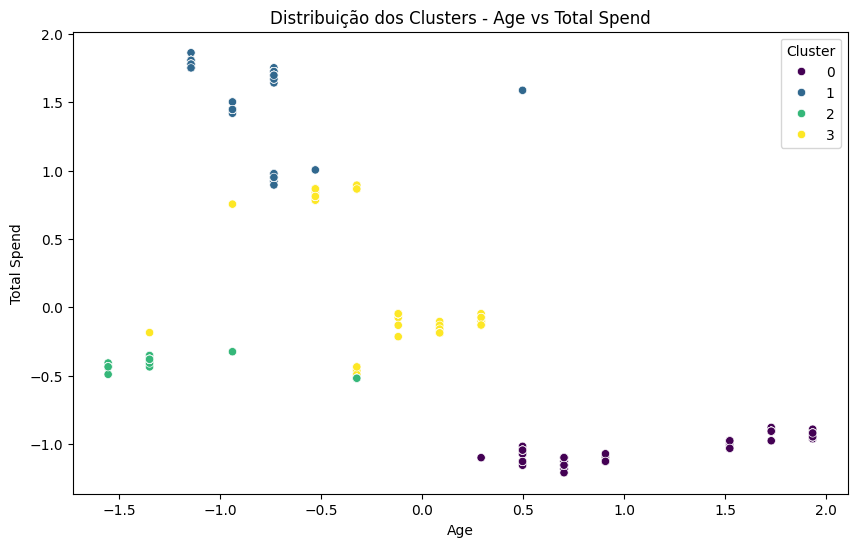

In [14]:
# Dispersão de Total Spend vs Age, colorido por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Age', y='Total Spend', hue='Cluster', palette='viridis')
plt.title('Distribuição dos Clusters - Age vs Total Spend')
plt.show()


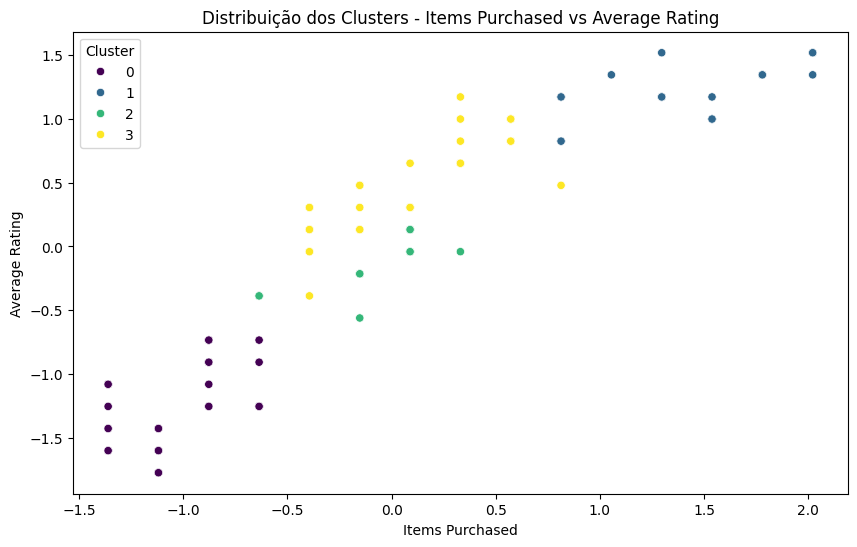

In [16]:
# Dispersão de Items Purchased vs Average Rating, colorido por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='Items Purchased', y='Average Rating', hue='Cluster', palette='viridis')
plt.title('Distribuição dos Clusters - Items Purchased vs Average Rating')
plt.show()

<Axes: xlabel='Total Spend'>

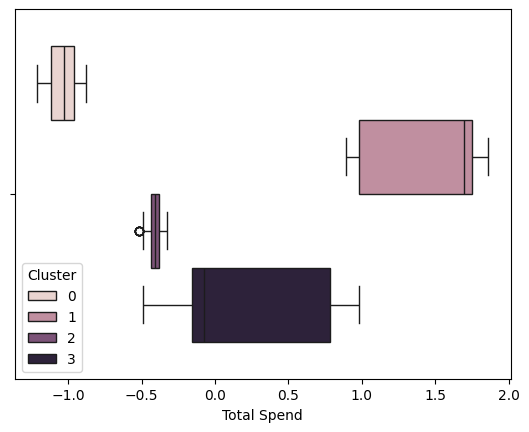

In [17]:
sns.boxplot(data=dados, x='Total Spend', hue='Cluster')